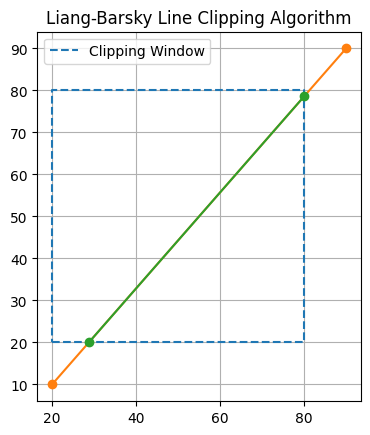

In [2]:
import matplotlib.pyplot as plt

def clip_line(x1, y1, x2, y2, xmin, ymin, xmax, ymax):
    dx = x2 - x1
    dy = y2 - y1

    p1 = [-dx, dx, -dy, dy]
    p2 = [x1 - xmin, xmax - x1, y1 - ymin, ymax - y1]

    t1 = 0
    t2 = 1

    for i in range(4):
        if p1[i] == 0:
            if p2[i] < 0:
                return None  # Line is completely outside
        else:
            t = p2[i] / p1[i]

            if p1[i] < 0:
                t1 = max(t1, t)
            else:
                t2 = min(t2, t)

    if t1 < t2:
        clipped_x1 = x1 + t1 * dx
        clipped_y1 = y1 + t1 * dy
        clipped_x2 = x1 + t2 * dx
        clipped_y2 = y1 + t2 * dy
        return clipped_x1, clipped_y1, clipped_x2, clipped_y2
    else:
        return None  # Line is completely outside

def plot_line(x1, y1, x2, y2):
    plt.plot([x1, x2], [y1, y2], marker='o')

if __name__ == "__main__":
    xmin, ymin, xmax, ymax = 20, 20, 80, 80
    x1, y1, x2, y2 = 20, 10, 90, 90  # Line segment to be clipped

    # Create a figure and axis for plotting
    fig, ax = plt.subplots()

    # Plot the clipping window
    ax.plot([xmin, xmax, xmax, xmin, xmin], [ymin, ymin, ymax, ymax, ymin], linestyle='dashed', label="Clipping Window")

    # Plot the original line segment
    plot_line(x1, y1, x2, y2)

    # Clip the line segment
    clipped_line = clip_line(x1, y1, x2, y2, xmin, ymin, xmax, ymax)

    # If the clipped_line is not None, plot it
    if clipped_line is not None:
        x1, y1, x2, y2 = clipped_line
        plot_line(x1, y1, x2, y2)

    # Set the aspect ratio for the plot
    ax.set_aspect('equal', adjustable='box')

    # Add legend
    plt.legend()

    # Show the plot
    plt.grid()
    plt.title("Liang-Barsky Line Clipping Algorithm")
    plt.show()
